In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder

from  keras.wrappers.scikit_learn  import  KerasClassifier
from  sklearn.model_selection  import  GridSearchCV

import numpy as np
import pandas as pd

In [2]:
#part A)
df = pd.read_csv("https://raw.githubusercontent.com/FinalformSora/StockML/main/stocks%20v1%20-%20master%20sheet.csv")
df[0::24]
df.size

53520

In [3]:
#Data that  has been parsed and cleaned up
#Had to create a moving average for 50 day and 100 day. It requres calculation of previous days and finding the average
#increase is based on CLose-Open= if it equals positive its a true on increase
#AMD news is based on press release released by amd on their site. I had to manual add this in cause no site has this information parsed
#quarterly earning is also gather by searching the web for this release date
df

,Date,Stock name,Open,High,Low,Close*,Adj Close**,Volume,average volume per stock,Higher or lower then average volume,...,Volitity (1 or 0),mv50,Higher MV50,Higher than MVA50,MV100,Higher MVA100,Higher than MVA100,EMA 50,Higher then EMVA,Higher than EMVA 1
0,44294.0,S&P500,4089.95,4098.19,4082.54,4097.17,4097.17,3.901910e+09,4.358682e+09,No,...,0,3906.56,Yes,1,3893.72,Yes,1,3909.06,No,0
1,44293.0,S&P500,4074.29,4083.13,4068.31,4079.95,4079.95,4.112640e+09,4.358682e+09,No,...,0,3901.61,Yes,1,3888.90,Yes,1,3901.39,No,0
2,44292.0,S&P500,4075.57,4086.23,4068.14,4073.94,4073.94,4.027880e+09,4.358682e+09,No,...,0,3897.12,Yes,1,3883.46,Yes,1,3894.10,No,0
3,44291.0,S&P500,4034.44,4083.42,4034.44,4077.91,4077.91,3.999760e+09,4.358682e+09,No,...,0,3892.47,Yes,1,3878.31,Yes,1,3886.76,No,0
4,44287.0,S&P500,3992.78,4020.63,3992.78,4019.87,4019.87,4.151240e+09,4.358682e+09,No,...,0,3887.97,Yes,1,3873.07,Yes,1,3878.96,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,44286.0,CokeCola,294.35,297.74,288.59,288.78,288.78,3.410000e+04,4.625314e+04,No,...,0,276.98,Yes,1,272.16,Yes,1,280.08,No,0
2226,44287.0,CokeCola,287.78,289.94,286.95,289.17,289.17,2.280000e+04,4.625314e+04,No,...,0,277.64,Yes,1,272.73,Yes,1,280.43,No,0
2227,44291.0,CokeCola,288.15,298.87,288.00,295.19,295.19,3.000000e+04,4.625314e+04,No,...,0,278.39,Yes,1,273.27,Yes,1,281.01,No,0
2228,44292.0,CokeCola,297.62,301.77,296.14,296.36,296.36,2.140000e+04,4.625314e+04,No,...,0,279.07,Yes,1,273.86,Yes,1,281.61,No,0


In [4]:
cleanup_StockName = {"Stock name": {"CokeCola": 1, "S&P500": 2,"Apple": 3,"Gamestop":4}}
df = df.replace(cleanup_StockName)
df.head()

,Date,Stock name,Open,High,Low,Close*,Adj Close**,Volume,average volume per stock,Higher or lower then average volume,...,Volitity (1 or 0),mv50,Higher MV50,Higher than MVA50,MV100,Higher MVA100,Higher than MVA100,EMA 50,Higher then EMVA,Higher than EMVA 1
0,44294.0,2,4089.95,4098.19,4082.54,4097.17,4097.17,3.901910e+09,4.358682e+09,No,...,0,3906.56,Yes,1,3893.72,Yes,1,3909.06,No,0
1,44293.0,2,4074.29,4083.13,4068.31,4079.95,4079.95,4.112640e+09,4.358682e+09,No,...,0,3901.61,Yes,1,3888.90,Yes,1,3901.39,No,0
2,44292.0,2,4075.57,4086.23,4068.14,4073.94,4073.94,4.027880e+09,4.358682e+09,No,...,0,3897.12,Yes,1,3883.46,Yes,1,3894.10,No,0
3,44291.0,2,4034.44,4083.42,4034.44,4077.91,4077.91,3.999760e+09,4.358682e+09,No,...,0,3892.47,Yes,1,3878.31,Yes,1,3886.76,No,0
4,44287.0,2,3992.78,4020.63,3992.78,4019.87,4019.87,4.151240e+09,4.358682e+09,No,...,0,3887.97,Yes,1,3873.07,Yes,1,3878.96,No,0


In [5]:
df

,Date,Stock name,Open,High,Low,Close*,Adj Close**,Volume,average volume per stock,Higher or lower then average volume,...,Volitity (1 or 0),mv50,Higher MV50,Higher than MVA50,MV100,Higher MVA100,Higher than MVA100,EMA 50,Higher then EMVA,Higher than EMVA 1
0,44294.0,2,4089.95,4098.19,4082.54,4097.17,4097.17,3.901910e+09,4.358682e+09,No,...,0,3906.56,Yes,1,3893.72,Yes,1,3909.06,No,0
1,44293.0,2,4074.29,4083.13,4068.31,4079.95,4079.95,4.112640e+09,4.358682e+09,No,...,0,3901.61,Yes,1,3888.90,Yes,1,3901.39,No,0
2,44292.0,2,4075.57,4086.23,4068.14,4073.94,4073.94,4.027880e+09,4.358682e+09,No,...,0,3897.12,Yes,1,3883.46,Yes,1,3894.10,No,0
3,44291.0,2,4034.44,4083.42,4034.44,4077.91,4077.91,3.999760e+09,4.358682e+09,No,...,0,3892.47,Yes,1,3878.31,Yes,1,3886.76,No,0
4,44287.0,2,3992.78,4020.63,3992.78,4019.87,4019.87,4.151240e+09,4.358682e+09,No,...,0,3887.97,Yes,1,3873.07,Yes,1,3878.96,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,44286.0,1,294.35,297.74,288.59,288.78,288.78,3.410000e+04,4.625314e+04,No,...,0,276.98,Yes,1,272.16,Yes,1,280.08,No,0
2226,44287.0,1,287.78,289.94,286.95,289.17,289.17,2.280000e+04,4.625314e+04,No,...,0,277.64,Yes,1,272.73,Yes,1,280.43,No,0
2227,44291.0,1,288.15,298.87,288.00,295.19,295.19,3.000000e+04,4.625314e+04,No,...,0,278.39,Yes,1,273.27,Yes,1,281.01,No,0
2228,44292.0,1,297.62,301.77,296.14,296.36,296.36,2.140000e+04,4.625314e+04,No,...,0,279.07,Yes,1,273.86,Yes,1,281.61,No,0


In [6]:
feature_cols = ['Stock name','Volume avg','Volitity (1 or 0)','Higher than MVA50','Higher than MVA100','Higher than EMVA 1',]
X = df[feature_cols]
X.head()

,Stock name,Volume avg,Volitity (1 or 0),Higher than MVA50,Higher than MVA100,Higher than EMVA 1
0,2,0,0,1,1,0
1,2,0,0,1,1,0
2,2,0,0,1,1,0
3,2,0,0,1,1,0
4,2,0,0,1,1,0


In [7]:
#created the label based on if the stock increased or did not increase

In [8]:
y = df['higher closing 0 or 1']
y[::25]

0       1
25      0
50      0
75      1
100     1
       ..
2125    0
2150    1
2175    0
2200    1
2225    0
Name: higher closing 0 or 1, Length: 90, dtype: int64

In [9]:
#calling all the classifers
my_logreg = LogisticRegression()
my_decisiontree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=4)
my_RandomForest = RandomForestClassifier()
my_linreg = LinearRegression()
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)


In [10]:
#seting up train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [11]:
# training sets

knn.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
my_RandomForest.fit(X_train, y_train)
my_decisiontree.fit(X_train, y_train)
my_linreg.fit(X_train, y_train)
my_AdaBoost.fit(X_train,y_train)
my_XGBoost.fit(X_train,y_train)


[20:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=29, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=2, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [12]:
#Training
y_predict_lor = my_logreg.predict(X_test)
y_predict = knn.predict(X_test)
y_predict_dt = my_decisiontree.predict(X_test)
y_predict_rt = my_RandomForest.predict(X_test)
y_predict_LR = my_linreg.predict(X_test)
y_predict_AB = my_AdaBoost.predict(X_test)
y_predict_XB = my_XGBoost.predict(X_test)


In [69]:
#accuracy of the perdiction
from sklearn.metrics import accuracy_score

score_lor = accuracy_score(y_test, y_predict_lor)
score_dt = accuracy_score(y_test, y_predict_dt)
accuracy = accuracy_score(y_test, y_predict)
score_rt = accuracy_score(y_test,y_predict_rt)
score_AB = accuracy_score(y_test, y_predict_AB)
score_XB = accuracy_score(y_test, y_predict_XB)

y_predict_LR = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_predict_LR)
rmse = np.sqrt(mse)
print("Linear Regression",rmse)
print('LogisticRegression: ',score_lor)
print("Decision Tree: ",score_dt)
print("Random Forest: ",score_rt)
print("knn: ",accuracy)
print("AdaBoost: ",score_AB)
print("XGBoost: ",score_XB)

#Linear Regression doesnt have Predict Proba
var_LogR = my_logreg.predict_proba(X_test)
fpr_LogR, tpr_LogR, thresholds = metrics.roc_curve(y_test, var_LogR[:,1], pos_label=1)
AUC_LogR = metrics.auc(fpr_LogR, tpr_LogR)

var_DT = my_decisiontree.predict_proba(X_test)
fpr_DT, tpr_DT, thresholds = metrics.roc_curve(y_test, var_DT[:,1], pos_label=1)
AUC_dt = metrics.auc(fpr_DT, tpr_DT)

var_RF = my_RandomForest.predict_proba(X_test)
fpr_RF, tpr_RF, thresholds = metrics.roc_curve(y_test, var_RF[:,1], pos_label=1)
AUC_RF = metrics.auc(fpr_RF, tpr_RF)

var_KNN = knn.predict_proba(X_test)
fpr_KNN, tpr_KNN, thresholds = metrics.roc_curve(y_test, var_KNN[:,1], pos_label=1)
AUC_KNN = metrics.auc(fpr_KNN, tpr_KNN)

var_AB = my_AdaBoost.predict_proba(X_test)
fpr_AB, tpr_AB, thresholds = metrics.roc_curve(y_test, var_AB[:,1], pos_label=1)
AUC_AB = metrics.auc(fpr_AB, tpr_AB)

var_XB = my_XGBoost.predict_proba(X_test)
fpr_XB, tpr_XB, thresholds = metrics.roc_curve(y_test, var_XB[:,1], pos_label=1)
AUC_XB = metrics.auc(fpr_XB, tpr_XB)

Linear Regression 0.49425579970215155
LogisticRegression:  0.5770609318996416
Decision Tree:  0.5698924731182796
Random Forest:  0.5734767025089605
knn:  0.4767025089605735
AdaBoost:  0.578853046594982
XGBoost:  0.5716845878136201


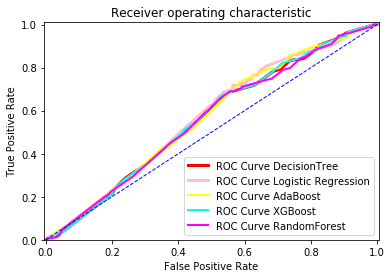

In [72]:
#8) plot the ROC curves of your algorithms in parts (c), (d), (e), (f), (g) 
import matplotlib.pyplot as plt

plt.figure()

# Roc Curve1:
plt.plot(fpr_DT, tpr_DT, color='red', lw=3, 
         label='ROC Curve DecisionTree' % AUC_dt)

# Roc Curve2:
plt.plot(fpr_LogR, tpr_LogR, color='pink', lw=3, 
         label='ROC Curve Logistic Regression' % AUC_LogR)

# Roc Curve3:
plt.plot(fpr_AB, tpr_AB, color='yellow', lw=2, 
         label='ROC Curve AdaBoost' % AUC_AB)

# Roc Curve4:
plt.plot(fpr_XB, tpr_XB, color='cyan', lw=2, 
         label='ROC Curve XGBoost' % AUC_XB)

plt.plot(fpr_RF, tpr_RF, color='magenta', lw=2, 
         label='ROC Curve RandomForest' % AUC_RF)
plt.plot(fpr_RF, tpr_RF, color='magenta', lw=2, 
         label='ROC Curve RandomForest' % AUC_RF)


fpr_RF
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [14]:
#Cross validation of all Classifers

In [15]:
accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Logistic Regression: ",accuracy_cv)

Logistic Regression:  0.4932553088803088


C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [16]:
accuracy_list = cross_val_score(my_RandomForest, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()

print("Random Forest: ",accuracy_cv)

Random Forest:  0.41352155727155726


In [17]:
accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()

print("KNN: ",accuracy_cv)


KNN:  0.41886261261261265


In [18]:
accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()

print("decisiontree: ",accuracy_cv)

decisiontree:  0.4309684684684685


In [19]:
mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print("Linear Regression: ",rmse_list.mean())


Linear Regression:  0.49712753948225075


In [20]:
accuracy_list = cross_val_score(my_AdaBoost, X, y, cv=10, scoring='accuracy')
accuracy_ab = accuracy_list.mean()

print("Adaboost : ",accuracy_ab)

Adaboost :  0.46760376447876445


In [21]:
accuracy_list = cross_val_score(my_XGBoost, X, y, cv=10, scoring='accuracy')
accuracy_XG = accuracy_list.mean()

print("XGBoost: ",accuracy_XG)

[20:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[20:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

In [22]:
from sklearn import preprocessing

preprocessing_features = preprocessing.scale(X)
preprocessing_features

array([[-0.44737412, -0.68486364, -1.        ,  0.73054783,  0.72406161,
        -0.7018812 ],
       [-0.44737412, -0.68486364, -1.        ,  0.73054783,  0.72406161,
        -0.7018812 ],
       [-0.44737412, -0.68486364, -1.        ,  0.73054783,  0.72406161,
        -0.7018812 ],
       ...,
       [-1.34212235, -0.68486364, -1.        ,  0.73054783,  0.72406161,
        -0.7018812 ],
       [-1.34212235, -0.68486364, -1.        ,  0.73054783,  0.72406161,
        -0.7018812 ],
       [-1.34212235, -0.68486364, -1.        ,  0.73054783,  0.72406161,
        -0.7018812 ]])

In [23]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.neural_network import MLPClassifier

my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True)

from sklearn.model_selection import cross_val_score
accuracy_list = cross_val_score(my_ANN, preprocessing_features, y, cv=10, scoring='accuracy')

Iteration 1, loss = 0.69664251
Iteration 2, loss = 0.69015354
Iteration 3, loss = 0.69045916
Iteration 4, loss = 0.70294732
Iteration 5, loss = 0.69049225
Iteration 6, loss = 0.69189355
Iteration 7, loss = 0.68874607
Iteration 8, loss = 0.69137206
Iteration 9, loss = 0.68842802
Iteration 10, loss = 0.69260204
Iteration 11, loss = 0.69946004
Iteration 12, loss = 0.68825308
Iteration 13, loss = 0.68879131
Iteration 14, loss = 0.69588369
Iteration 15, loss = 0.69164209
Iteration 16, loss = 0.69270426
Iteration 17, loss = 0.69311327
Iteration 18, loss = 0.69042326
Iteration 19, loss = 0.69003976
Iteration 20, loss = 0.69060657
Iteration 21, loss = 0.68952447
Iteration 22, loss = 0.69472355
Iteration 23, loss = 0.69384379
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69746371
Iteration 2, loss = 0.69255591
Iteration 3, loss = 0.69345499
Iteration 4, loss = 0.70385583
Iteration 5, loss = 0.68927348
Iteration 6, loss = 0.691621

In [24]:
accuracy_cv_mean = accuracy_list.mean()

print(accuracy_cv_mean)
print("Accuracy for ML is " + str((accuracy_cv_mean * 100)) + "%")

0.49673825611325617
Accuracy for ML is 49.67382561132562%


In [43]:
#feature_cols = ['Stock name','Volume avg','Volitity (1 or 0)','Higher than MVA50','Higher than MVA100','Higher than MVA100','Higher than EMVA 1']
feature_cols_No_EMVA = ['Stock name','Volume avg','Volitity (1 or 0)','Higher than MVA50','Higher than MVA100',]
X = df[feature_cols_No_EMVA]
y = df['higher closing 0 or 1']

#seting up train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

knn.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
my_RandomForest.fit(X_train, y_train)
my_decisiontree.fit(X_train, y_train)
my_linreg.fit(X_train, y_train)
my_AdaBoost.fit(X_train,y_train)
my_XGBoost.fit(X_train,y_train)

#Training
y_predict_lor = my_logreg.predict(X_test)
y_predict = knn.predict(X_test)
y_predict_dt = my_decisiontree.predict(X_test)
y_predict_rt = my_RandomForest.predict(X_test)
y_predict_LR = my_linreg.predict(X_test)
y_predict_AB = my_AdaBoost.predict(X_test)
y_predict_XB = my_XGBoost.predict(X_test)

#accuracy of the perdiction
from sklearn.metrics import accuracy_score

score_lor = accuracy_score(y_test, y_predict_lor)
score_dt = accuracy_score(y_test, y_predict_dt)
accuracy = accuracy_score(y_test, y_predict)
score_rt = accuracy_score(y_test,y_predict_rt)
score_AB = accuracy_score(y_test, y_predict_AB)
score_XB = accuracy_score(y_test, y_predict_XB)

y_predict_LR = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_predict_LR)
rmse = np.sqrt(mse)
print("Linear Regression",rmse)
print('LogisticRegression: ',score_lor)
print("Decision Tree: ",score_dt)
print("Random Forest: ",score_rt)
print("knn: ",accuracy)
print("AdaBoost: ",score_AB)
print("XGBoost: ",score_XB)

mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print("Linear Regression: ",rmse_list.mean())

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Logistic Regression: ",accuracy_cv)

accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("decisiontree: ",accuracy_cv)

accuracy_list = cross_val_score(my_RandomForest, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Random Forest: ",accuracy_cv)

accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("KNN: ",accuracy_cv)

accuracy_list = cross_val_score(my_AdaBoost, X, y, cv=10, scoring='accuracy')
accuracy_ab = accuracy_list.mean()
print("Adaboost : ",accuracy_ab)

accuracy_list = cross_val_score(my_XGBoost, X, y, cv=10, scoring='accuracy')
accuracy_XG = accuracy_list.mean()
print("XGBoost: ",accuracy_XG)

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[21:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Linear Regression 0.494128924757012
LogisticRegression:  0.5806451612903226
Decision Tree:  0.5645161290322581
Random Forest:  0.5645161290322581
knn:  0.48028673835125446
AdaBoost:  0.5752688172043011
XGBoost:  0.5645161290322581
Linear Regression:  0.49691967989592917
Logistic Regression:  0.5098375160875162


C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

decisiontree:  0.4175233268983269
Random Forest:  0.43045768983268984
KNN:  0.44970640283140284
Adaboost :  0.4751890283140283
[21:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly se

C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[21:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

In [44]:
preprocessing_features = preprocessing.scale(X)
preprocessing_features

my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True)

accuracy_list = cross_val_score(my_ANN, preprocessing_features, y, cv=10, scoring='accuracy')

accuracy_cv_mean = accuracy_list.mean()

print(accuracy_cv_mean)
print("Accuracy for ML is " + str((accuracy_cv_mean * 100)) + "%")

Iteration 1, loss = 0.70844122
Iteration 2, loss = 0.69126202
Iteration 3, loss = 0.68853412
Iteration 4, loss = 0.69056783
Iteration 5, loss = 0.69370731
Iteration 6, loss = 0.69096780
Iteration 7, loss = 0.70094691
Iteration 8, loss = 0.70216289
Iteration 9, loss = 0.69267004
Iteration 10, loss = 0.69145461
Iteration 11, loss = 0.69108823
Iteration 12, loss = 0.69159680
Iteration 13, loss = 0.69420241
Iteration 14, loss = 0.69707153
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70655780
Iteration 2, loss = 0.69091895
Iteration 3, loss = 0.69006396
Iteration 4, loss = 0.69368305
Iteration 5, loss = 0.69753246
Iteration 6, loss = 0.69096927
Iteration 7, loss = 0.70262084
Iteration 8, loss = 0.70102910
Iteration 9, loss = 0.69146328
Iteration 10, loss = 0.69175728
Iteration 11, loss = 0.69175006
Iteration 12, loss = 0.69435144
Iteration 13, loss = 0.69761925
Iteration 14, loss = 0.69399005
Training loss did not improve mo

In [56]:
#feature_cols = ['Stock name','Volume avg','Volitity (1 or 0)','Higher than MVA50','Higher than MVA100','Higher than MVA100','Higher than EMVA 1']
feature_cols_No_MVA100 = ['Stock name','Volume avg','Volitity (1 or 0)','Higher than MVA50','Higher than MVA100','Higher than EMVA 1']
X = df[feature_cols_No_MVA100]
y = df['higher closing 0 or 1']

#seting up train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

knn.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
my_RandomForest.fit(X_train, y_train)
my_decisiontree.fit(X_train, y_train)
my_linreg.fit(X_train, y_train)
my_AdaBoost.fit(X_train,y_train)
my_XGBoost.fit(X_train,y_train)

#Training
y_predict_lor = my_logreg.predict(X_test)
y_predict = knn.predict(X_test)
y_predict_dt = my_decisiontree.predict(X_test)
y_predict_rt = my_RandomForest.predict(X_test)
y_predict_LR = my_linreg.predict(X_test)
y_predict_AB = my_AdaBoost.predict(X_test)
y_predict_XB = my_XGBoost.predict(X_test)

#accuracy of the perdiction
from sklearn.metrics import accuracy_score

score_lor = accuracy_score(y_test, y_predict_lor)
score_dt = accuracy_score(y_test, y_predict_dt)
accuracy = accuracy_score(y_test, y_predict)
score_rt = accuracy_score(y_test,y_predict_rt)
score_AB = accuracy_score(y_test, y_predict_AB)
score_XB = accuracy_score(y_test, y_predict_XB)

y_predict_LR = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_predict_LR)
rmse = np.sqrt(mse)
print("Linear Regression",rmse)
print('LogisticRegression: ',score_lor)
print("Decision Tree: ",score_dt)
print("Random Forest: ",score_rt)
print("knn: ",accuracy)
print("AdaBoost: ",score_AB)
print("XGBoost: ",score_XB)

mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print("Linear Regression: ",rmse_list.mean())

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Logistic Regression: ",accuracy_cv)

accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("decisiontree: ",accuracy_cv)

accuracy_list = cross_val_score(my_RandomForest, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Random Forest: ",accuracy_cv)

accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("KNN: ",accuracy_cv)

accuracy_list = cross_val_score(my_AdaBoost, X, y, cv=10, scoring='accuracy')
accuracy_ab = accuracy_list.mean()
print("Adaboost : ",accuracy_ab)

accuracy_list = cross_val_score(my_XGBoost, X, y, cv=10, scoring='accuracy')
accuracy_XG = accuracy_list.mean()
print("XGBoost: ",accuracy_XG)

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Linear Regression 0.49425579970215155
LogisticRegression:  0.5770609318996416
Decision Tree:  0.5698924731182796
Random Forest:  0.5734767025089605
knn:  0.4767025089605735
AdaBoost:  0.578853046594982
XGBoost:  0.5716845878136201
Linear Regression:  0.49712753948225075
Logistic Regression: 

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 0.4932553088803088
decisiontree:  0.4309684684684685
Random Forest:  0.4332006113256113
KNN:  0.41886261261261265
Adaboost :  0.46760376447876445
[21:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[21:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

In [57]:
preprocessing_features = preprocessing.scale(X)
preprocessing_features

my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True)

accuracy_list = cross_val_score(my_ANN, preprocessing_features, y, cv=10, scoring='accuracy')

accuracy_cv_mean = accuracy_list.mean()

print(accuracy_cv_mean)
print("Accuracy for ML is " + str((accuracy_cv_mean * 100)) + "%")

Iteration 1, loss = 0.69664251
Iteration 2, loss = 0.69015354
Iteration 3, loss = 0.69045916
Iteration 4, loss = 0.70294732
Iteration 5, loss = 0.69049225
Iteration 6, loss = 0.69189355
Iteration 7, loss = 0.68874607
Iteration 8, loss = 0.69137206
Iteration 9, loss = 0.68842802
Iteration 10, loss = 0.69260204
Iteration 11, loss = 0.69946004
Iteration 12, loss = 0.68825308
Iteration 13, loss = 0.68879131
Iteration 14, loss = 0.69588369
Iteration 15, loss = 0.69164209
Iteration 16, loss = 0.69270426
Iteration 17, loss = 0.69311327
Iteration 18, loss = 0.69042326
Iteration 19, loss = 0.69003976
Iteration 20, loss = 0.69060657
Iteration 21, loss = 0.68952447
Iteration 22, loss = 0.69472355
Iteration 23, loss = 0.69384379
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69746371
Iteration 2, loss = 0.69255591
Iteration 3, loss = 0.69345499
Iteration 4, loss = 0.70385583
Iteration 5, loss = 0.68927348
Iteration 6, loss = 0.691621

In [50]:
#feature_cols = ['Stock name','Volume avg','Volitity (1 or 0)','Higher than MVA50','Higher than MVA100','feature_cols_No_EMVA']
feature_cols_No_MVA50 = ['Stock name','Volume avg','Volitity (1 or 0)','Higher than MVA100','Higher than EMVA 1']
X = df[feature_cols_No_MVA50]
y = df['higher closing 0 or 1']

#seting up train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

knn.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
my_RandomForest.fit(X_train, y_train)
my_decisiontree.fit(X_train, y_train)
my_linreg.fit(X_train, y_train)
my_AdaBoost.fit(X_train,y_train)
my_XGBoost.fit(X_train,y_train)

#Training
y_predict_lor = my_logreg.predict(X_test)
y_predict = knn.predict(X_test)
y_predict_dt = my_decisiontree.predict(X_test)
y_predict_rt = my_RandomForest.predict(X_test)
y_predict_LR = my_linreg.predict(X_test)
y_predict_AB = my_AdaBoost.predict(X_test)
y_predict_XB = my_XGBoost.predict(X_test)

#accuracy of the perdiction
from sklearn.metrics import accuracy_score

score_lor = accuracy_score(y_test, y_predict_lor)
score_dt = accuracy_score(y_test, y_predict_dt)
accuracy = accuracy_score(y_test, y_predict)
score_rt = accuracy_score(y_test,y_predict_rt)
score_AB = accuracy_score(y_test, y_predict_AB)
score_XB = accuracy_score(y_test, y_predict_XB)

y_predict_LR = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_predict_LR)
rmse = np.sqrt(mse)
print("Linear Regression",rmse)
print('LogisticRegression: ',score_lor)
print("Decision Tree: ",score_dt)
print("Random Forest: ",score_rt)
print("knn: ",accuracy)
print("AdaBoost: ",score_AB)
print("XGBoost: ",score_XB)

mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print("Linear Regression: ",rmse_list.mean())

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Logistic Regression: ",accuracy_cv)

accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("decisiontree: ",accuracy_cv)

accuracy_list = cross_val_score(my_RandomForest, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Random Forest: ",accuracy_cv)

accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("KNN: ",accuracy_cv)

accuracy_list = cross_val_score(my_AdaBoost, X, y, cv=10, scoring='accuracy')
accuracy_ab = accuracy_list.mean()
print("Adaboost : ",accuracy_ab)

accuracy_list = cross_val_score(my_XGBoost, X, y, cv=10, scoring='accuracy')
accuracy_XG = accuracy_list.mean()
print("XGBoost: ",accuracy_XG)

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Linear Regression 0.495515260382338
LogisticRegression:  0.5734767025089605
Decision Tree:  0.5501792114695341
Random Forest:  0.546594982078853
knn:  0.4838709677419355
AdaBoost:  0.5645161290322581
XGBoost:  0.546594982078853
Linear Regression:  0.49736537225974675
Logistic Regression:  0.5045286357786358
decisiontree: 

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 0.45962837837837844
Random Forest:  0.43059443371943373
KNN:  0.46379504504504504
Adaboost :  0.47753378378378375
[21:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metri

C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [51]:
preprocessing_features = preprocessing.scale(X)
preprocessing_features

my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True)

accuracy_list = cross_val_score(my_ANN, preprocessing_features, y, cv=10, scoring='accuracy')

accuracy_cv_mean = accuracy_list.mean()

print(accuracy_cv_mean)
print("Accuracy for ML is " + str((accuracy_cv_mean * 100)) + "%")

Iteration 1, loss = 0.70734459
Iteration 2, loss = 0.69174705
Iteration 3, loss = 0.68949695
Iteration 4, loss = 0.69085201
Iteration 5, loss = 0.69406345
Iteration 6, loss = 0.69168366
Iteration 7, loss = 0.70248889
Iteration 8, loss = 0.70328733
Iteration 9, loss = 0.69330718
Iteration 10, loss = 0.69208533
Iteration 11, loss = 0.69150902
Iteration 12, loss = 0.69190205
Iteration 13, loss = 0.69486037
Iteration 14, loss = 0.69779720
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70561503
Iteration 2, loss = 0.69158441
Iteration 3, loss = 0.69125918
Iteration 4, loss = 0.69428773
Iteration 5, loss = 0.69789774
Iteration 6, loss = 0.69176699
Iteration 7, loss = 0.70422975
Iteration 8, loss = 0.70218986
Iteration 9, loss = 0.69211033
Iteration 10, loss = 0.69226917
Iteration 11, loss = 0.69209984
Iteration 12, loss = 0.69464495
Iteration 13, loss = 0.69803482
Iteration 14, loss = 0.69442842
Training loss did not improve mo

In [52]:
#feature_cols = ['Stock name','Volume avg','Volitity (1 or 0)','Higher than MVA50','Higher than MVA100','Higher than EMVA 1',]
feature_cols_No_Volitility = ['Stock name','Volume avg','Higher than MVA50','Higher than MVA100','Higher than EMVA 1',]
X = df[feature_cols_No_Volitility]
y = df['higher closing 0 or 1']

#seting up train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

knn.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
my_RandomForest.fit(X_train, y_train)
my_decisiontree.fit(X_train, y_train)
my_linreg.fit(X_train, y_train)
my_AdaBoost.fit(X_train,y_train)
my_XGBoost.fit(X_train,y_train)

#Training
y_predict_lor = my_logreg.predict(X_test)
y_predict = knn.predict(X_test)
y_predict_dt = my_decisiontree.predict(X_test)
y_predict_rt = my_RandomForest.predict(X_test)
y_predict_LR = my_linreg.predict(X_test)
y_predict_AB = my_AdaBoost.predict(X_test)
y_predict_XB = my_XGBoost.predict(X_test)

#accuracy of the perdiction
from sklearn.metrics import accuracy_score

score_lor = accuracy_score(y_test, y_predict_lor)
score_dt = accuracy_score(y_test, y_predict_dt)
accuracy = accuracy_score(y_test, y_predict)
score_rt = accuracy_score(y_test,y_predict_rt)
score_AB = accuracy_score(y_test, y_predict_AB)
score_XB = accuracy_score(y_test, y_predict_XB)

y_predict_LR = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_predict_LR)
rmse = np.sqrt(mse)
print("Linear Regression",rmse)
print('LogisticRegression: ',score_lor)
print("Decision Tree: ",score_dt)
print("Random Forest: ",score_rt)
print("knn: ",accuracy)
print("AdaBoost: ",score_AB)
print("XGBoost: ",score_XB)

mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print("Linear Regression: ",rmse_list.mean())

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Logistic Regression: ",accuracy_cv)

accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("decisiontree: ",accuracy_cv)

accuracy_list = cross_val_score(my_RandomForest, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Random Forest: ",accuracy_cv)

accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("KNN: ",accuracy_cv)

accuracy_list = cross_val_score(my_AdaBoost, X, y, cv=10, scoring='accuracy')
accuracy_ab = accuracy_list.mean()
print("Adaboost : ",accuracy_ab)

accuracy_list = cross_val_score(my_XGBoost, X, y, cv=10, scoring='accuracy')
accuracy_XG = accuracy_list.mean()
print("XGBoost: ",accuracy_XG)

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Linear Regression 0.49344653856856296
LogisticRegression:  0.5716845878136201
Decision Tree:  0.5698924731182796
Random Forest:  0.5627240143369175
knn:  0.4767025089605735
AdaBoost:  0.578853046594982
XGBoost:  0.5716845878136201
Linear Regression:  0.4968061383607988
Logistic Regression: 

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 0.5289736164736165
decisiontree:  0.4309684684684685
Random Forest:  0.4287121943371943
KNN:  0.41886261261261265
Adaboost :  0.46760376447876445
[21:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[21:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

In [53]:
preprocessing_features = preprocessing.scale(X)
preprocessing_features

my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True)

accuracy_list = cross_val_score(my_ANN, preprocessing_features, y, cv=10, scoring='accuracy')

accuracy_cv_mean = accuracy_list.mean()

print(accuracy_cv_mean)
print("Accuracy for ML is " + str((accuracy_cv_mean * 100)) + "%")

Iteration 1, loss = 0.70589535
Iteration 2, loss = 0.68999007
Iteration 3, loss = 0.68776894
Iteration 4, loss = 0.68955887
Iteration 5, loss = 0.69278130
Iteration 6, loss = 0.69005953
Iteration 7, loss = 0.70056038
Iteration 8, loss = 0.70138239
Iteration 9, loss = 0.69125109
Iteration 10, loss = 0.69013002
Iteration 11, loss = 0.68993197
Iteration 12, loss = 0.69086588
Iteration 13, loss = 0.69337594
Iteration 14, loss = 0.69594484
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70441449
Iteration 2, loss = 0.68989315
Iteration 3, loss = 0.69016325
Iteration 4, loss = 0.69336816
Iteration 5, loss = 0.69684750
Iteration 6, loss = 0.69034982
Iteration 7, loss = 0.70258256
Iteration 8, loss = 0.70062473
Iteration 9, loss = 0.69045036
Iteration 10, loss = 0.69093190
Iteration 11, loss = 0.69105766
Iteration 12, loss = 0.69398401
Iteration 13, loss = 0.69708442
Training loss did not improve more than tol=0.000100 for 10 cons

In [54]:
#feature_cols = ['Stock name','Volume avg','Volitity (1 or 0)','Higher than MVA50','Higher than MVA100','Higher than EMVA 1',]
feature_cols_No_Volume = ['Stock name','Volitity (1 or 0)','Higher than MVA50','Higher than MVA100','Higher than EMVA 1',]
X = df[feature_cols_No_Volume]
y = df['higher closing 0 or 1']

#seting up train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

knn.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
my_RandomForest.fit(X_train, y_train)
my_decisiontree.fit(X_train, y_train)
my_linreg.fit(X_train, y_train)
my_AdaBoost.fit(X_train,y_train)
my_XGBoost.fit(X_train,y_train)

#Training
y_predict_lor = my_logreg.predict(X_test)
y_predict = knn.predict(X_test)
y_predict_dt = my_decisiontree.predict(X_test)
y_predict_rt = my_RandomForest.predict(X_test)
y_predict_LR = my_linreg.predict(X_test)
y_predict_AB = my_AdaBoost.predict(X_test)
y_predict_XB = my_XGBoost.predict(X_test)

#accuracy of the perdiction
from sklearn.metrics import accuracy_score

score_lor = accuracy_score(y_test, y_predict_lor)
score_dt = accuracy_score(y_test, y_predict_dt)
accuracy = accuracy_score(y_test, y_predict)
score_rt = accuracy_score(y_test,y_predict_rt)
score_AB = accuracy_score(y_test, y_predict_AB)
score_XB = accuracy_score(y_test, y_predict_XB)

y_predict_LR = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_predict_LR)
rmse = np.sqrt(mse)
print("Linear Regression",rmse)
print('LogisticRegression: ',score_lor)
print("Decision Tree: ",score_dt)
print("Random Forest: ",score_rt)
print("knn: ",accuracy)
print("AdaBoost: ",score_AB)
print("XGBoost: ",score_XB)

mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print("Linear Regression: ",rmse_list.mean())

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Logistic Regression: ",accuracy_cv)

accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("decisiontree: ",accuracy_cv)

accuracy_list = cross_val_score(my_RandomForest, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("Random Forest: ",accuracy_cv)

accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print("KNN: ",accuracy_cv)

accuracy_list = cross_val_score(my_AdaBoost, X, y, cv=10, scoring='accuracy')
accuracy_ab = accuracy_list.mean()
print("Adaboost : ",accuracy_ab)

accuracy_list = cross_val_score(my_XGBoost, X, y, cv=10, scoring='accuracy')
accuracy_XG = accuracy_list.mean()
print("XGBoost: ",accuracy_XG)

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Linear Regression 0.49438822694546736
LogisticRegression:  0.5752688172043011
Decision Tree:  0.5734767025089605
Random Forest:  0.5716845878136201
knn:  0.48028673835125446
AdaBoost:  0.5770609318996416
XGBoost:  0.5752688172043011
Linear Regression:  0.49694525989499966


C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Logistic Regression:  0.5186936936936937
decisiontree:  0.4958252895752896
Random Forest:  0.46190074002574005
KNN:  0.49857625482625495
Adaboost :  0.49124839124839126
[21:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was change

C:\Users\jesus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[21:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

In [55]:
preprocessing_features = preprocessing.scale(X)
preprocessing_features

my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True)

accuracy_list = cross_val_score(my_ANN, preprocessing_features, y, cv=10, scoring='accuracy')

accuracy_cv_mean = accuracy_list.mean()

print(accuracy_cv_mean)
print("Accuracy for ML is " + str((accuracy_cv_mean * 100)) + "%")

Iteration 1, loss = 0.70521725
Iteration 2, loss = 0.69062425
Iteration 3, loss = 0.68849297
Iteration 4, loss = 0.69028759
Iteration 5, loss = 0.69294621
Iteration 6, loss = 0.69019900
Iteration 7, loss = 0.70101994
Iteration 8, loss = 0.70173958
Iteration 9, loss = 0.69161184
Iteration 10, loss = 0.69048383
Iteration 11, loss = 0.69029952
Iteration 12, loss = 0.69128596
Iteration 13, loss = 0.69370392
Iteration 14, loss = 0.69638727
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70392277
Iteration 2, loss = 0.68980375
Iteration 3, loss = 0.69026568
Iteration 4, loss = 0.69367306
Iteration 5, loss = 0.69678301
Iteration 6, loss = 0.69046693
Iteration 7, loss = 0.70264889
Iteration 8, loss = 0.70055721
Iteration 9, loss = 0.69049988
Iteration 10, loss = 0.69102599
Iteration 11, loss = 0.69113343
Iteration 12, loss = 0.69412753
Iteration 13, loss = 0.69715670
Training loss did not improve more than tol=0.000100 for 10 cons